# Advance Machine Learning
## Practice Work 2 : Model optimisation

The goal is to select the best model and optimize it. 

### Load dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [2]:
PATH = './datasets/data_immobilier.csv'

In [3]:
dataset = pd.read_csv(PATH)

In [4]:
dataset.sample(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
969,970,190,RL,75.0,10382,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,ConLD,Normal,140000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
802,803,60,RL,63.0,8199,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,189000
704,705,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,213000
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1209,1210,20,RL,85.0,10182,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,290000
759,760,60,RL,65.0,12257,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,290000
726,727,20,RL,NaN,21695,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,222000
332,333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
717,718,20,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2008,WD,Normal,157000


In [5]:
dataset.shape

(1460, 81)

In [6]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

### Preprocessing

In order to use models, we have to preprocess data of our dataset.
As the price distribution to be predicted is spread over several order of magnitude, we are going to work on the log of the price rather than the price to avoid too much sensitivity to outliers. 
It is also a great practice to apply this function in the summaries (very useful for linear regressions). 

As our dataset is composed of numerical values and also string (categorical) values, we are going to only approach numerical values into Gaussian distribution. String values will be considered as categorical values and as we cannot compute categorical values in our model, we are encoding these features. 

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
df = dataset.copy()
LE = LabelEncoder()

To dermine if a feature is following the normal distribution, we are going to analyse the skewness. 
In statistics, normality tests are used to determine whether a data set is modeled for normal distribution. Many statistical functions require that a distribution be normal or nearly normal. There are both graphical and statistical methods for evaluating normality:
- Graphical methods include the histogram and normality plot
- Statistically, two numerical measures of shape – *skewness and excess kurtosis* – can be used to test for normality. **If skewness is not close to zero, then your data set is not normally distributed.**

I have decided to take the skewness approach : 

In statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. As a general rule of thumb:
- If skewness is less than -1 or greater than 1, the distribution is highly skewed.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [9]:
skewness = {}
for col in df.columns: 
    if df[col].dtypes == 'O': 
        df[col] = df[col].astype('category')
        df[col] = LE.fit_transform(df[col])
    else: 
        skewness[col] = df.skew(numeric_only=None)[col]
    df = df.dropna(subset=[col])

<ipython-input-9-9e67f6732a51>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness[col] = df.skew(numeric_only=None)[col]


In [10]:
cols_to_normalize = []
for col in skewness: 
    if skewness[col] >= -0.5 and skewness[col] <= 0.5: 
        pass
    else: 
        cols_to_normalize.append(col)

In [11]:
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,3,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,3,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,3,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,3,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,3,0,12,2008,8,4,250000
5,6,50,3,85.0,14115,1,2,0,3,0,...,0,3,2,1,700,10,2009,8,4,143000
6,7,20,3,75.0,10084,1,2,3,3,0,...,0,3,4,3,0,8,2007,8,4,307000
8,9,50,4,51.0,6120,1,2,3,3,0,...,0,3,4,3,0,4,2008,8,0,129900
9,10,190,3,50.0,7420,1,2,3,3,0,...,0,3,4,3,0,1,2008,8,4,118000
10,11,20,3,70.0,11200,1,2,3,3,0,...,0,3,4,3,0,2,2008,8,4,129500


In [12]:
# log of non-normally dstributed features => avoids too much sensitivity to outliers
for col in cols_to_normalize: 
    df[col] = df[col].apply(lambda x : np.log(x) if x > 0 else 0)

In [13]:
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.094345,3,4.174387,9.041922,1,2,3,3,0,...,0.0,3,4,3,0.000000,2,2008,8,4,12.247694
1,2,2.995732,3,4.382027,9.169518,1,2,3,3,0,...,0.0,3,4,3,0.000000,5,2007,8,4,12.109011
2,3,4.094345,3,4.219508,9.328123,1,2,0,3,0,...,0.0,3,4,3,0.000000,9,2008,8,4,12.317167
3,4,4.248495,3,4.094345,9.164296,1,2,0,3,0,...,0.0,3,4,3,0.000000,2,2006,8,0,11.849398
4,5,4.094345,3,4.430817,9.565214,1,2,0,3,0,...,0.0,3,4,3,0.000000,12,2008,8,4,12.429216
5,6,3.912023,3,4.442651,9.554993,1,2,0,3,0,...,0.0,3,2,1,6.551080,10,2009,8,4,11.870600
6,7,2.995732,3,4.317488,9.218705,1,2,3,3,0,...,0.0,3,4,3,0.000000,8,2007,8,4,12.634603
8,9,3.912023,4,3.931826,8.719317,1,2,3,3,0,...,0.0,3,4,3,0.000000,4,2008,8,0,11.774520
9,10,5.247024,3,3.912023,8.911934,1,2,3,3,0,...,0.0,3,4,3,0.000000,1,2008,8,4,11.678440
10,11,2.995732,3,4.248495,9.323669,1,2,3,3,0,...,0.0,3,4,3,0.000000,2,2008,8,4,11.771436


### Feature importance

Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.

**Feature importance scores can provide insight into the dataset.** The relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant. This may be interpreted by a domain expert and could be used as the basis for gathering more or different data.

**Feature importance scores can provide insight into the model.** Most importance scores are calculated by a predictive model that has been fit on the dataset. Inspecting the importance score provides insight into that specific model and which features are the most important and least important to the model when making a prediction. This is a type of model interpretation that can be performed for those models that support it.

**Feature importance can be used to improve a predictive model.** This can be achieved by using the importance scores to select those features to delete (lowest scores) or those features to keep (highest scores). This is a type of feature selection and can simplify the problem that is being modeled, speed up the modeling process (deleting features is called dimensionality reduction), and in some cases, improve the performance of the model.

In [ ]:
from sklearn.inspection import permutation_importance

In [14]:
def feature_importance(model, model_coef, X_train, y_train): 
    importance_info = list(zip(X_train.columns, model_coef))
    importance = pd.DataFrame(importance_info, columns=["feature", "importance"])
    results = permutation_importance(model, X_train, y_train, scoring='neg_mean_squared_error').importances_mean
    importance["by_permutation"] = results
    return importance

## Regression models 

In [16]:
# train & test split
X_train = df.sample(frac = 0.8, random_state = 25)
y_train = X_train["SalePrice"]
X_train = X_train.drop(["SalePrice"], axis=1)

X_test = df.drop(X_train.index)
y_test = X_test["SalePrice"]
X_test = X_test.drop(["SalePrice"], axis=1)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((897, 80), (897,), (224, 80), (224,))

### Linear regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(f"Train accuracy : {lr.score(X_train,y_train)}")
print(f"Test accuracy : {lr.score(X_test,y_test)}")

Train accuracy : 0.9195007495393277
Test accuracy : 0.8077954722634981


In [20]:
lr_importance = feature_importance(lr, lr.coef_, X_train, y_train)

<BarContainer object of 20 artists>

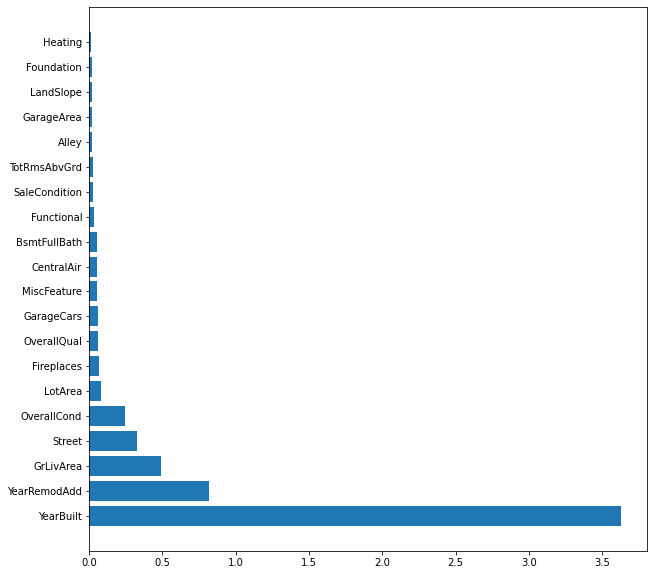

In [68]:
lr_importance = lr_importance.sort_values('importance', ascending=False)
pyplot.figure(figsize=(10, 10))
pyplot.barh(lr_importance.feature[:20], lr_importance.importance[:20])

<BarContainer object of 20 artists>

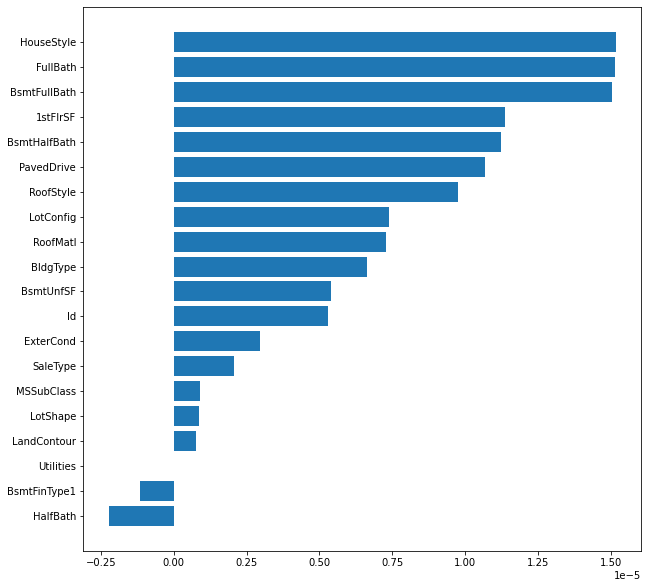

In [67]:
lr_importance = lr_importance.sort_values('by_permutation', ascending=True)
pyplot.figure(figsize=(10, 10))
pyplot.barh(lr_importance.feature[:20], lr_importance.by_permutation[:20])

### Random Forests

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print(f"Train accuracy : {rf.score(X_train,y_train)}")
print(f"Test accuracy : {rf.score(X_test,y_test)}")

Train accuracy : 0.9827878878506192
Test accuracy : 0.8449217450361818


In [25]:
rf_importance = feature_importance(rf, rf.feature_importances_, X_train, y_train)

<BarContainer object of 20 artists>

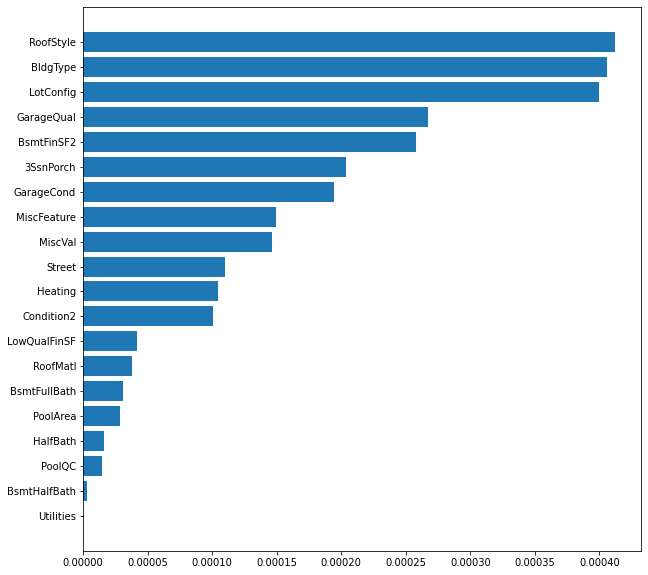

In [51]:
rf_importance = rf_importance.sort_values('importance', ascending=True)
pyplot.figure(figsize=(10, 10))
pyplot.barh(rf_importance.feature[:20], rf_importance.importance[:20])

<BarContainer object of 20 artists>

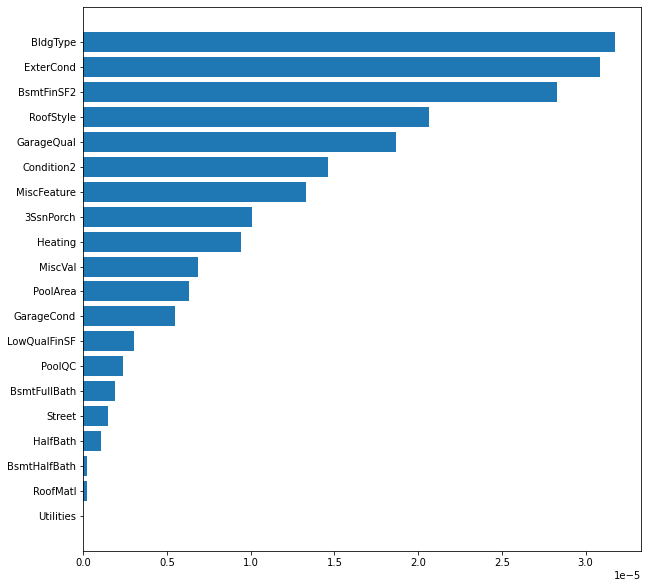

In [52]:
rf_importance = rf_importance.sort_values('by_permutation', ascending=True)
pyplot.figure(figsize=(10, 10))
pyplot.barh(rf_importance.feature[:20], rf_importance.by_permutation[:20])

### Random Forests with Cross-Validation and RandomSearch

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [30]:
# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(
    estimator = rf, 
    param_distributions = random_grid,
    n_iter = 100, 
    scoring='neg_mean_absolute_error', 
    cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)


In [31]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

### RandomForest with GridSearch

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    'bootstrap': [False],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': [1],
    'min_samples_split': [4],
    'n_estimators': [550, 600, 650]
}

rf = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [35]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1], 'min_samples_split': [4],
                         'n_estimators': [550, 600, 650]},
             return_train_score=True, verbose=2)

In [36]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 600}

In [37]:
rf_grid = RandomForestRegressor(bootstrap = False, max_depth = 25, max_features = 'sqrt',
    min_samples_leaf = 1, min_samples_split = 4, n_estimators = 600)

rf_grid.fit(X_train, y_train)
print(f"Train accuracy : {rf_grid.score(X_train,y_train)}")
print(f"Test accuracy : {rf_grid.score(X_test,y_test)}")

Train accuracy : 0.9982889375593265
Test accuracy : 0.853803794353134


In [38]:
rf_grid_importance = feature_importance(rf_grid, rf_grid.feature_importances_, X_train, y_train)

<BarContainer object of 20 artists>

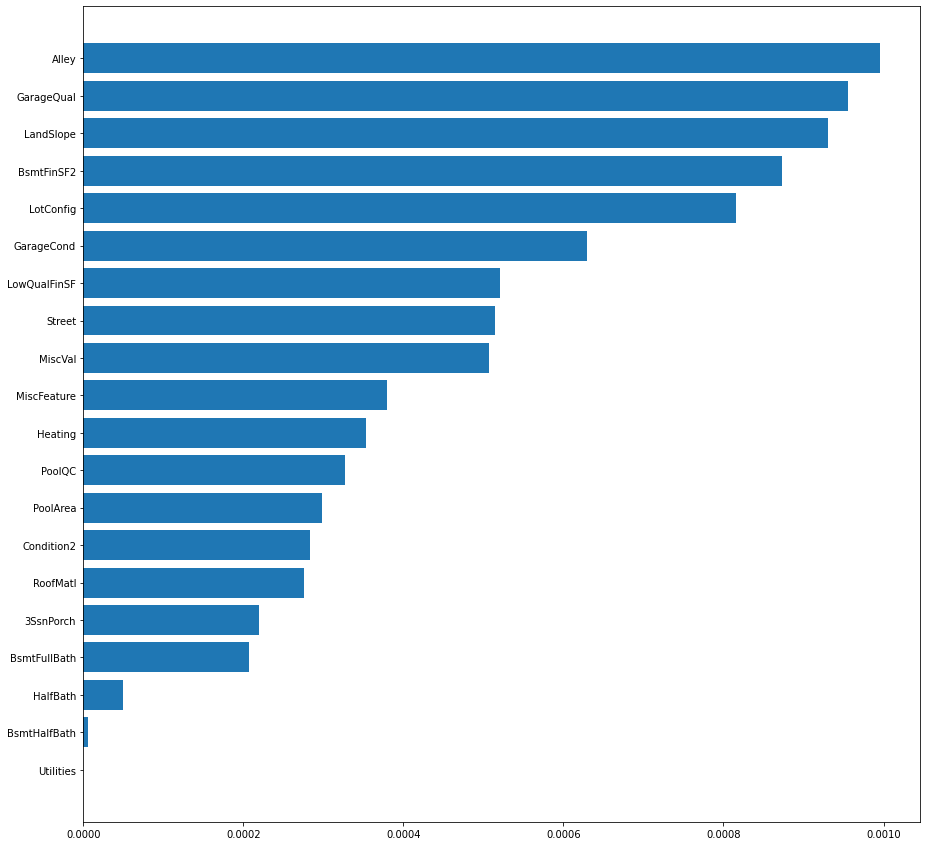

In [53]:
rf_grid_importance = rf_grid_importance.sort_values('importance', ascending=True)
pyplot.figure(figsize=(15,15))
pyplot.barh(rf_grid_importance.feature[:20], rf_grid_importance.importance[:20])

<BarContainer object of 20 artists>

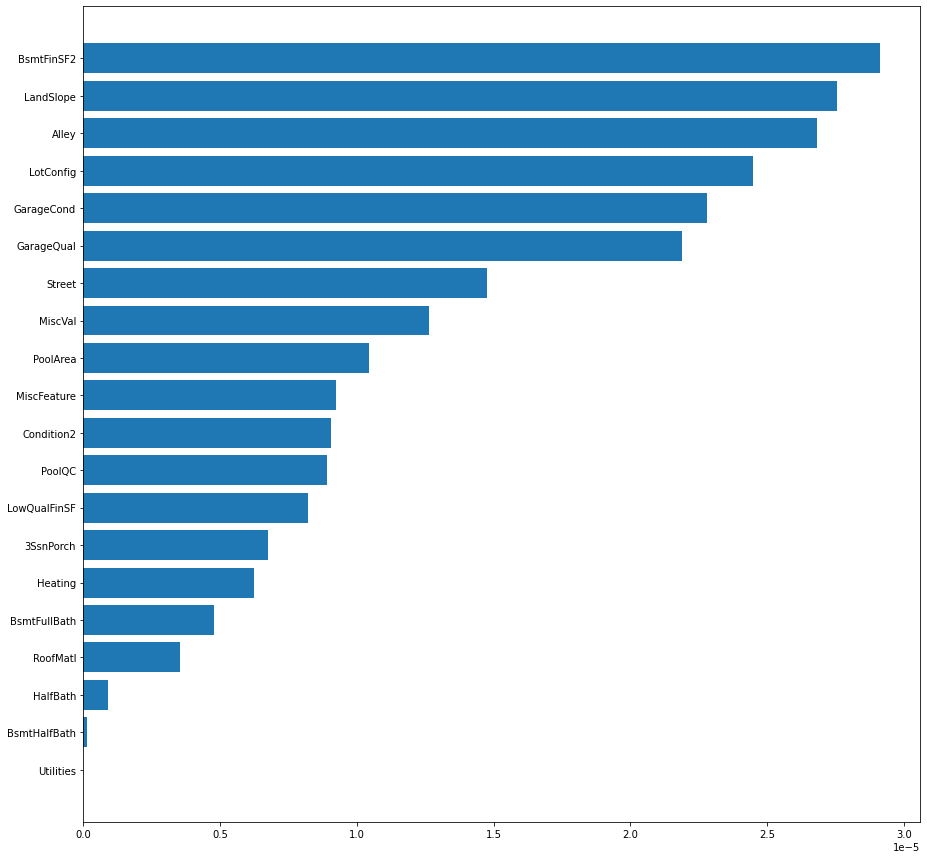

In [54]:
rf_grid_importance = rf_grid_importance.sort_values('by_permutation', ascending=True)
pyplot.figure(figsize=(15,15))
pyplot.barh(rf_grid_importance.feature[:20], rf_grid_importance.by_permutation[:20])

### XGBoost

In [41]:
from xgboost import XGBRegressor

In [42]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
print(f"Train accuracy : {xgb.score(X_train,y_train)}")
print(f"Test accuracy : {xgb.score(X_test,y_test)}")

Train accuracy : 0.9998649521022465
Test accuracy : 0.8473847331683265


In [43]:
xgb_importance = feature_importance(xgb, xgb.feature_importances_, X_train, y_train)

<BarContainer object of 20 artists>

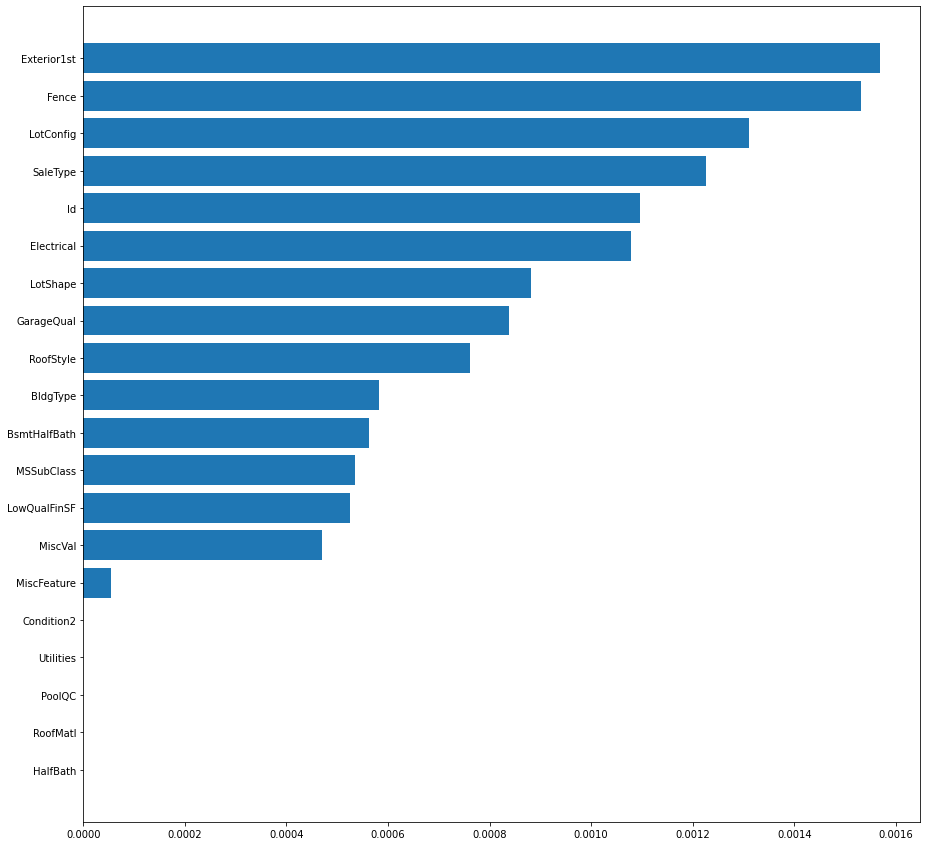

In [56]:
xgb_importance = xgb_importance.sort_values('importance', ascending=True)
pyplot.figure(figsize=(15,15))
pyplot.barh(xgb_importance.feature[:20], xgb_importance.importance[:20])

<BarContainer object of 20 artists>

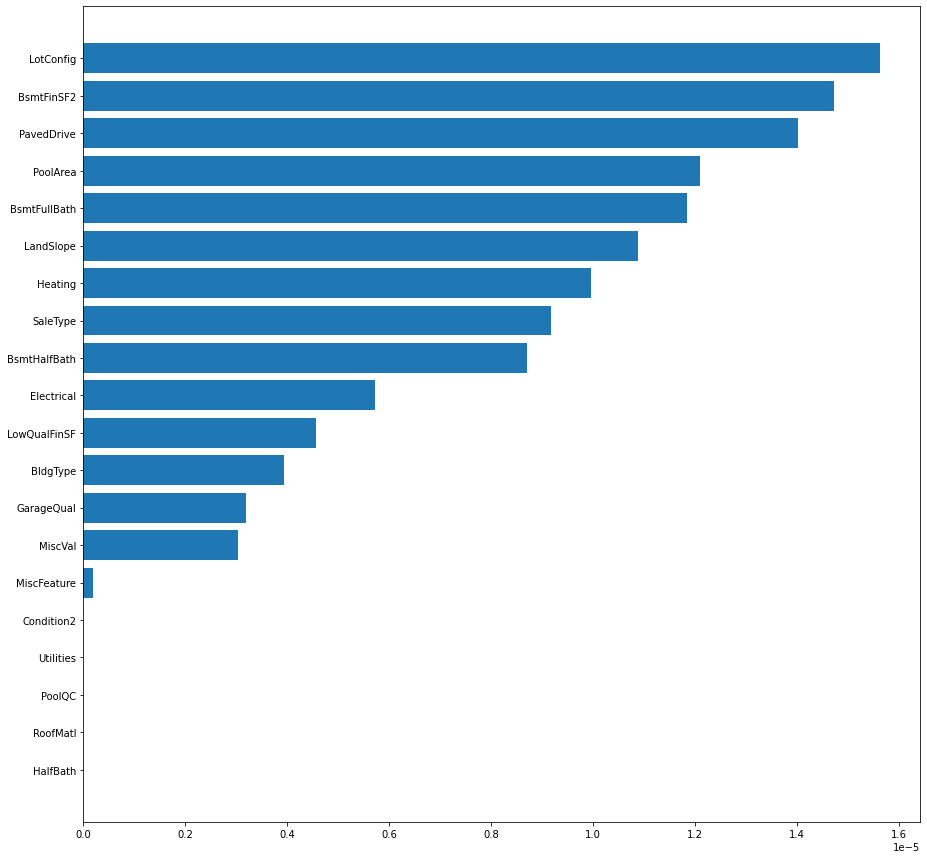

In [57]:
xgb_importance = xgb_importance.sort_values('by_permutation', ascending=True)
pyplot.figure(figsize=(15,15))
pyplot.barh(xgb_importance.feature[:20], xgb_importance.by_permutation[:20])